Erick Trinidad Limón Ace A01735902
S (específico) - Se busca analizar los patrones de comportamiento de los usuarios en las redes sociales y compararlos con los dispositivos utilizados para publicar contenido, con el fin de obtener una mejor comprensión de su actividad en la plataforma.
M (medible) - El progreso del proyecto se medirá según la cantidad de datos procesados y la identificación de los usuarios más activos y comprometidos en la plataforma.
A (alcanzable) - La meta es realista y alcanzable dado que se basa en la recopilación y análisis de datos existentes en la plataforma. Se utilizarán herramientas y técnicas disponibles para la visualización y análisis de los datos.
R (relevante) - La meta es relevante debido a que ayuda a mejorar y aumentar el engagement en la plataforma de redes sociales además de ayudar a comprender mejor el comportamiento de los usuarios en Twitter. La visualización de las diferencias entre followers y sources de los tweets puede proporcionar información valiosa sobre los patrones de uso de Twitter.
T (marco de tiempo) - La meta debe realizarse antes del día 24 de marzo del 2023 lo que da un tiempo de trabajo de aproximadamente 4 horas.


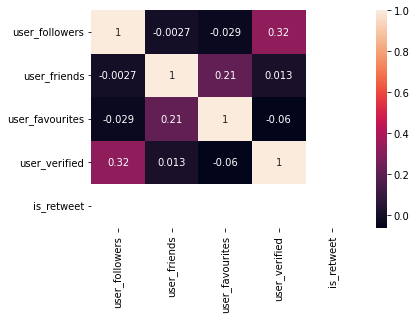

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

df = pd.read_csv('sample_data/covid19_tweets.csv')



"""Mapas de calor"""
corrmat = df.corr()
sns.heatmap(corrmat, annot=True)
plt.show()  

In [5]:
df['source'].value_counts().nlargest(5)

Twitter Web App        22974
Twitter for Android    16758
Twitter for iPhone     15824
TweetDeck               3453
Hootsuite Inc.          2846
Name: source, dtype: int64

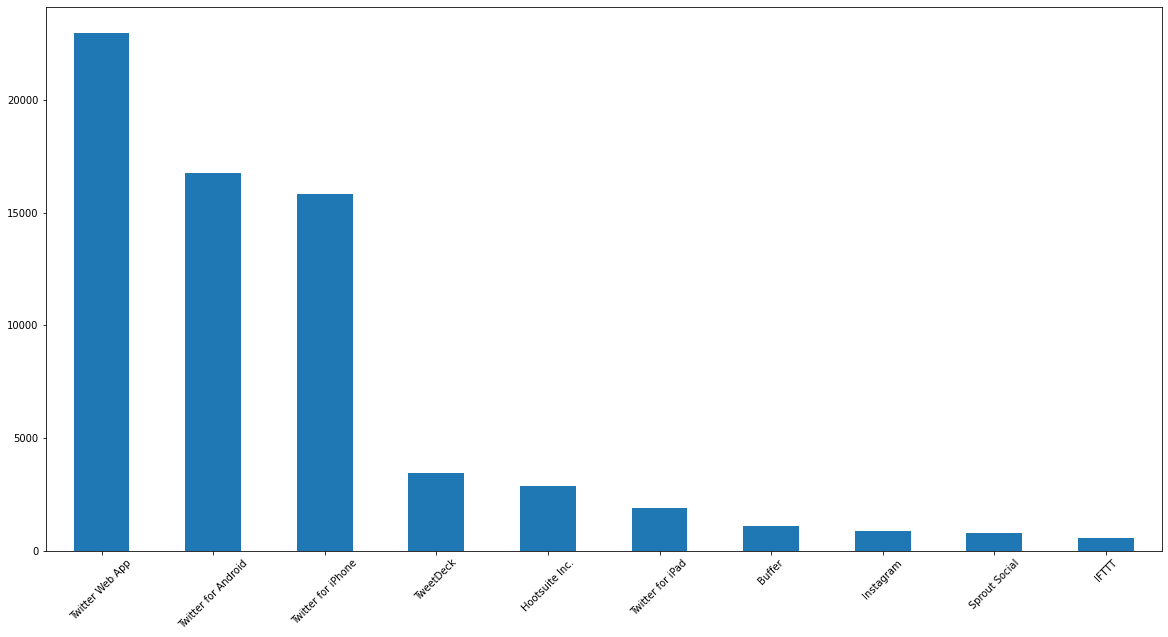

In [6]:
plt.figure(figsize=(20,10))
df['source'].value_counts().nlargest(10).plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

Teniendo el top 3

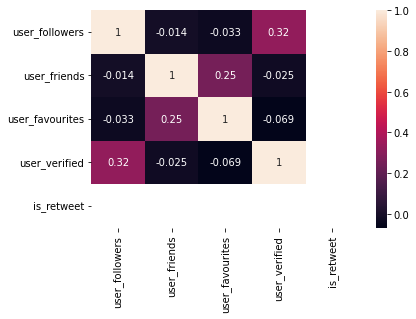

In [7]:
df2 = df[df["source"] == "Twitter Web App"]
corrmat = df2.corr()
sns.heatmap(corrmat, annot=True)
plt.show()

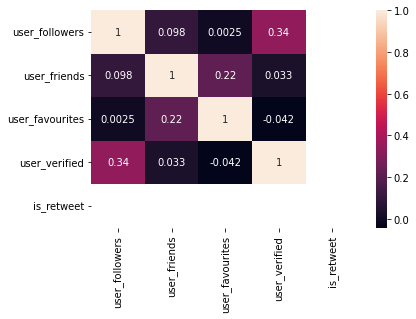

In [8]:
df2 = df[df["source"] == "Twitter for Android"]
corrmat = df2.corr()
sns.heatmap(corrmat, annot=True)
plt.show()

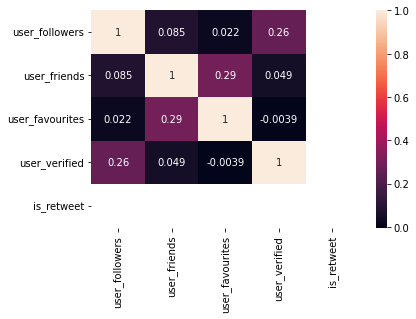

In [9]:
df2 = df[df["source"] == "Twitter for iPhone"]
corrmat = df2.corr()
sns.heatmap(corrmat, annot=True)
plt.show()

Tambien podemos ver la relación entre followers y plataforma que utilizan los usuarios


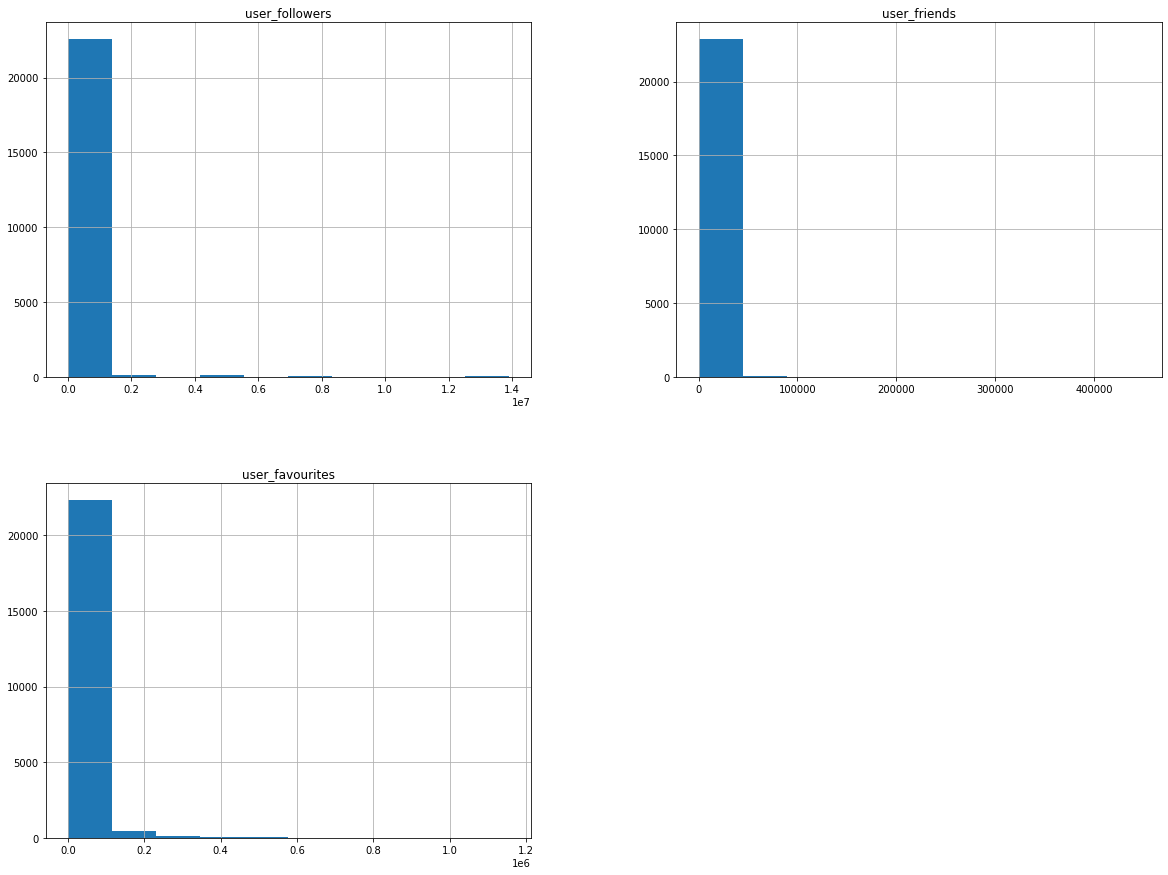

In [11]:
df2 = df[df["source"] == "Twitter Web App"]
df2.hist(figsize=(20,15))
plt.show()

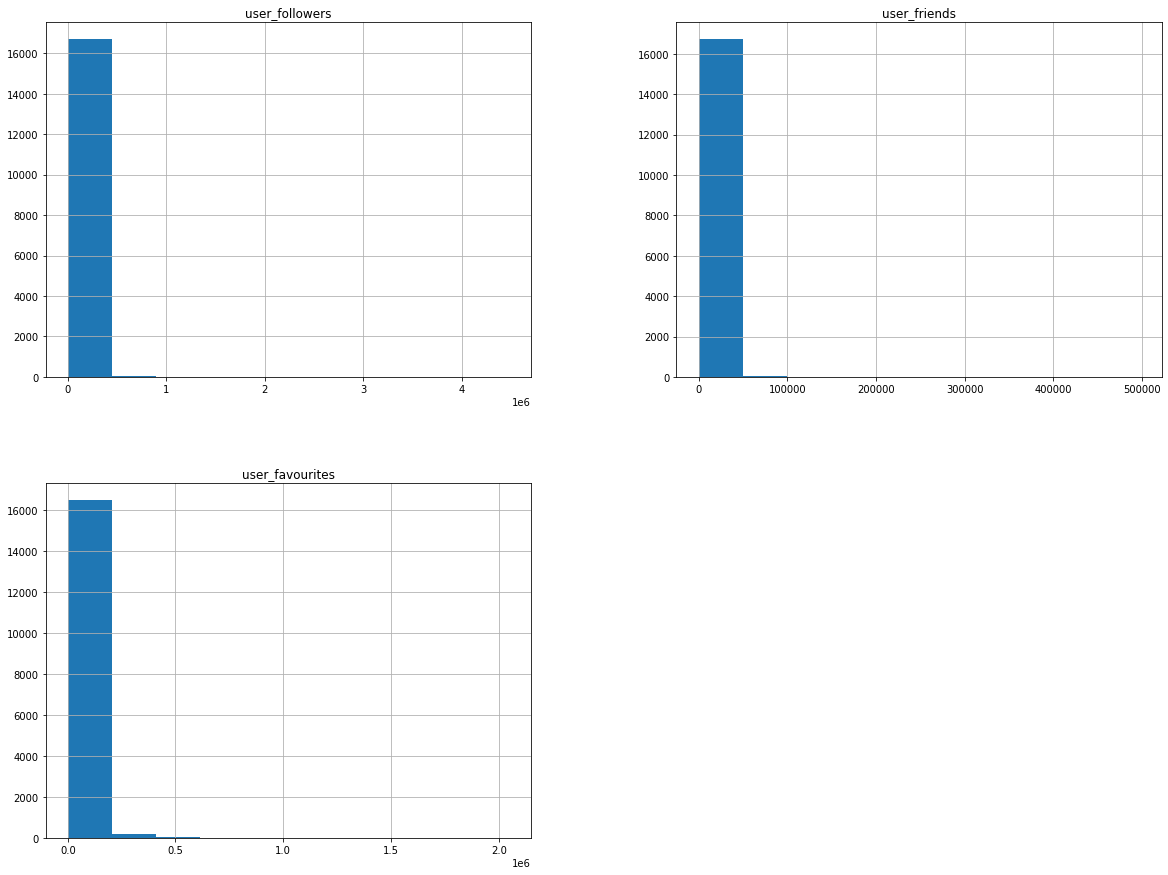

In [12]:
df2 = df[df["source"] == "Twitter for Android"]
df2.hist(figsize=(20,15))
plt.show()

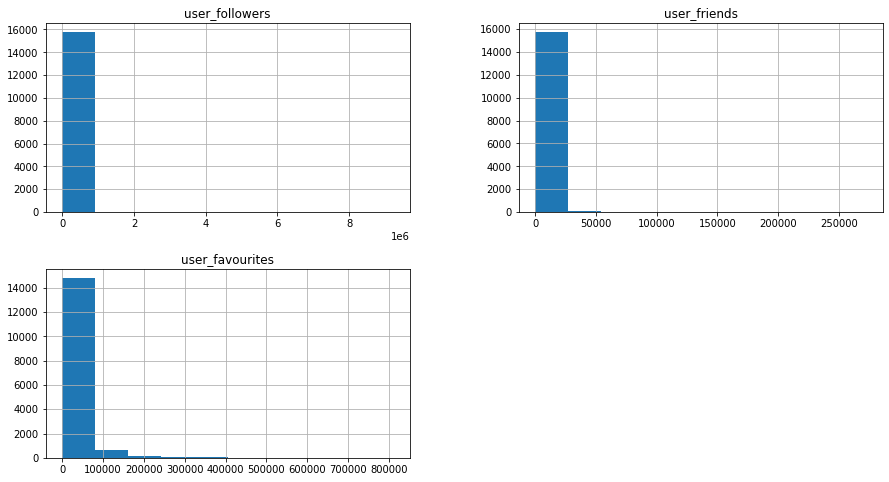

In [13]:
df2 = df[df["source"] == "Twitter for iPhone"]
df2.hist(figsize=(15,8))
plt.show()

Con base en esta información podemos ver que por ejemplo, puede haber casos en los que el usuario tenga muchos seguidores, pero la mayoría de sus tweets se publiquen desde un solo dispositivo, lo que podría sugerir que el usuario no está muy activo en la plataforma o que solo usa un dispositivo específico para publicar contenido. Por otro lado, puede haber situaciones en las que el usuario publique tweets desde varios dispositivos diferentes, lo que podría indicar que el usuario está más activo en la plataforma o que utiliza diferentes dispositivos para diferentes tipos de contenido.

En resumen, se trata de analizar los patrones de comportamiento de los usuarios en las redes sociales y compararlos con los dispositivos utilizados para publicar contenido, con el fin de obtener una mejor comprensión de su actividad en la plataforma.

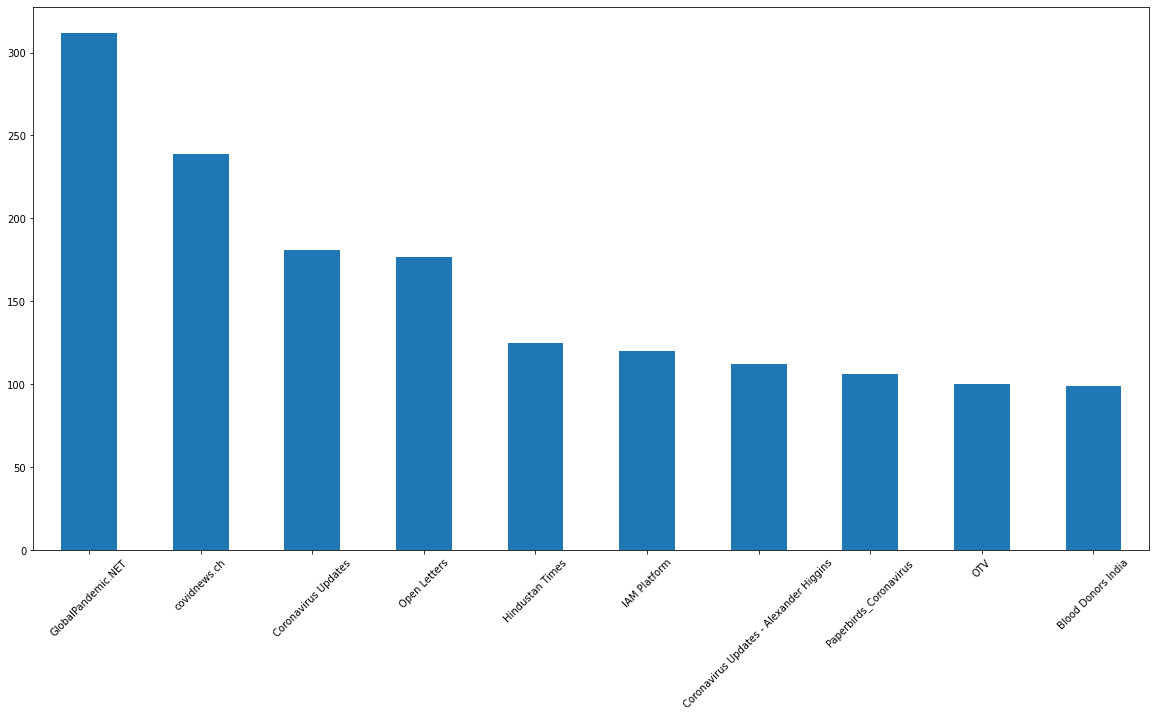

In [18]:
plt.figure(figsize=(20,10))
df['user_name'].value_counts().nlargest(10).plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

Podemos hacer el ejercicio con el top 10 usuarios con mas followers

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 127487 (\N{REGIONAL INDICATOR SYMBOL LETTER Z}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 127462 (\N{REGIONAL INDICATOR SYMBOL LETTER A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 127475 (\N{REGIONAL INDICATOR SYMBOL LETTER N}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 127468 (\N{REGIONAL INDICATOR SYMBOL LETTER G}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 129346 (\N{CLINKING GLASSES}) missing from current font.
  fig.canvas.print_figure

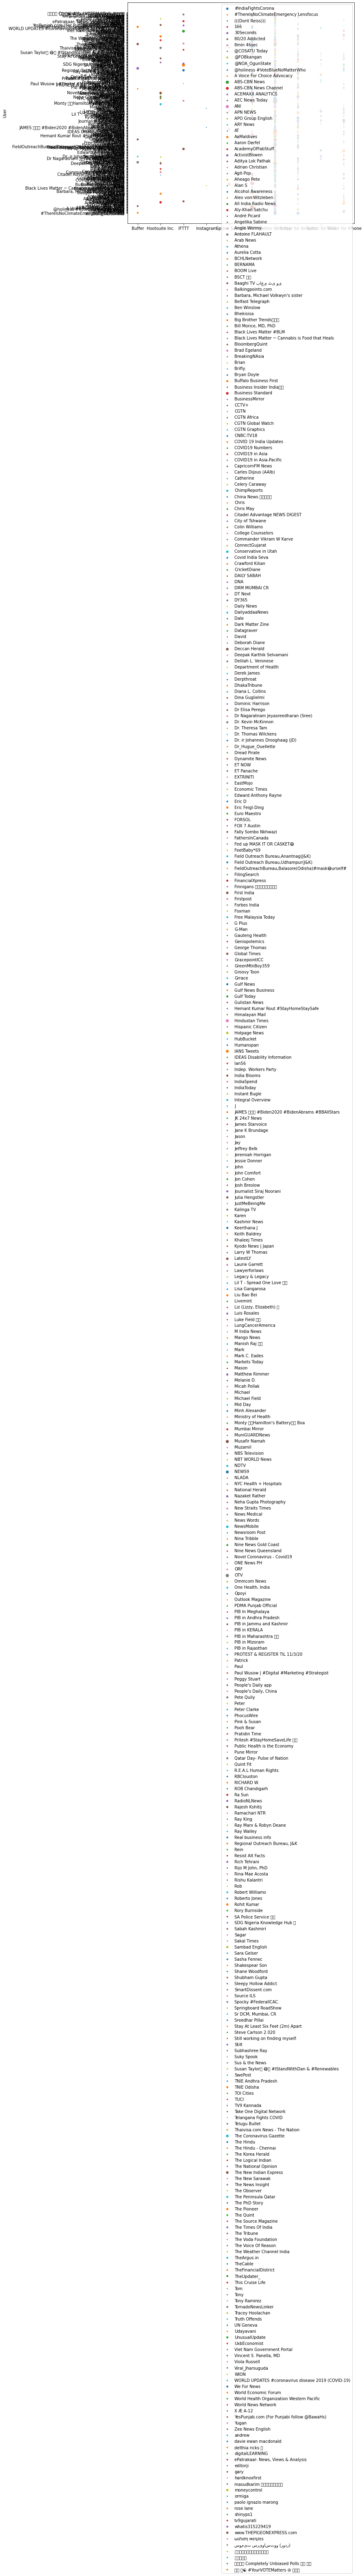

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

df2 = df[df['source'].isin(df['source'].value_counts().nlargest(10).index)]
table = pd.crosstab(df2['source'], df2['user_name'])
table = table.loc[:, table.sum(axis=0) >= 10] # solo incluir usuarios con al menos 10 publicaciones

fig, ax = plt.subplots(figsize=(10, 10))
for user in table.columns:
    ax.scatter(table.index, [user] * len(table), s=table[user], label=user)
ax.set_xlabel('Source')
ax.set_ylabel('User')
ax.legend()
plt.show()


Este codigo filtra los datos según las 10 fuentes con más publicaciones. Luego, utiliza pd.crosstab para contar la cantidad de publicaciones por usuario y por fuente, y selecciona solo los usuarios que tienen al menos 10 publicaciones. Luego, itera sobre los usuarios y utiliza plt.scatter para graficar el número de publicaciones por fuente y usuario.

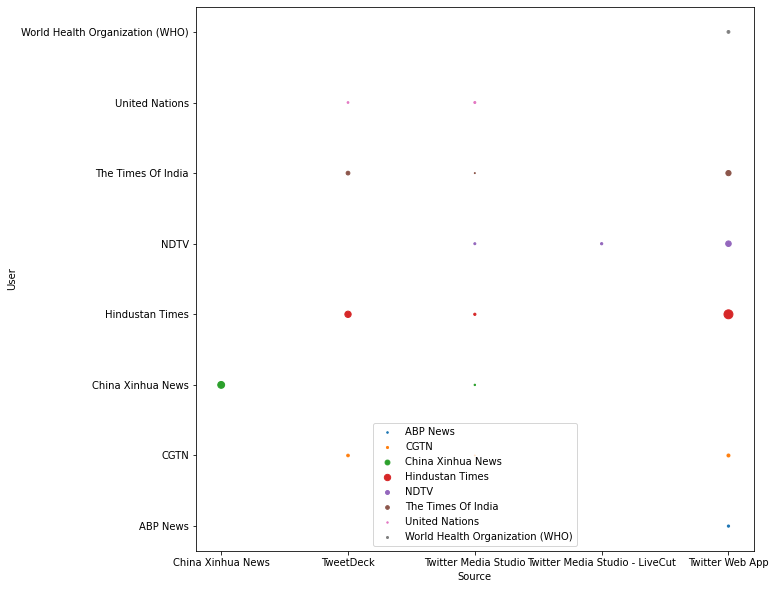

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

top_users = df.groupby('user_name')['user_followers'].max().nlargest(10)
df2 = df[df['user_name'].isin(top_users.index)]
df2 = df2[df2['source'].isin(df2['source'].value_counts().nlargest(5).index)]
table = pd.crosstab(df2['source'], df2['user_name'])

fig, ax = plt.subplots(figsize=(10, 10))
for user in table.columns:
    ax.scatter(table.index, [user] * len(table), s=table[user], label=user)
ax.set_xlabel('Source')
ax.set_ylabel('User')
ax.legend()
plt.show()



Como queremos algo mas especifico reducimos el numero a solo el top 10 de usuarios respecto al top 5 de plataformas

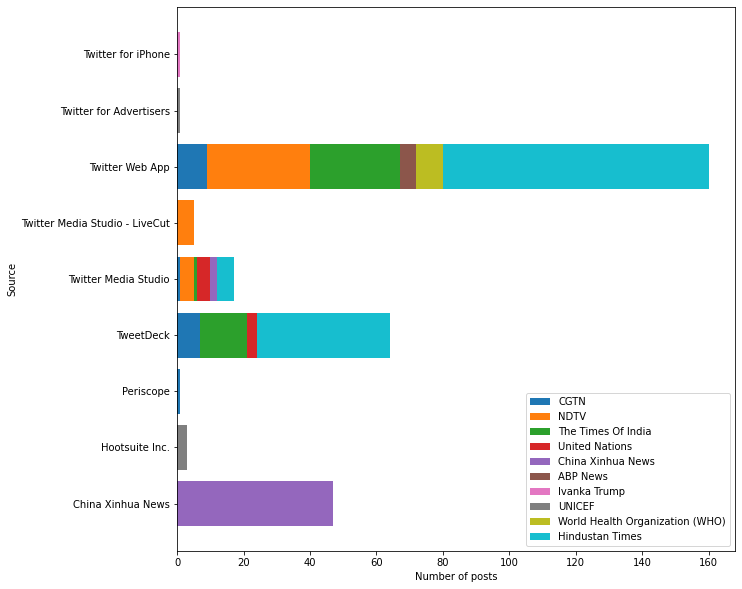

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

top_users = df.groupby('user_name')['user_followers'].max().nlargest(10)
df2 = df[df['user_name'].isin(top_users.index)]
df2 = df2[df2['source'].isin(df2['source'].value_counts().nlargest(10).index)]
table = pd.crosstab(df2['source'], df2['user_name'])
table = table[top_users.index]

fig, ax = plt.subplots(figsize=(10, 10))
for i, user in enumerate(table.columns):
    ax.barh(range(len(table)), table[user], height=0.8, left=table.iloc[:, :i].sum(axis=1), label=user)
ax.set_yticks(range(len(table)))
ax.set_yticklabels(table.index)
ax.set_xlabel('Number of posts')
ax.set_ylabel('Source')
ax.legend()
plt.show()


Hacemos lo mismo pero con una gráfica de barras con X los sources y Y los usuarios

Con esto podemos ver que por ejemplo, a pesar de que existan mas usuarios de twitter usando plataformas como android o iphone, en realidad no representan un numero cuando hablamos del alcance que puede llegar a tener cuentas que usan twitter web app.

Puede haber casos en los que el usuario tenga muchos seguidores, pero la mayoría de sus tweets se publiquen desde un solo dispositivo, lo que podría sugerir que el usuario no está muy activo en la plataforma o que solo usa un dispositivo específico para publicar contenido. Por otro lado, puede haber situaciones en las que el usuario publique tweets desde varios dispositivos diferentes, lo que podría indicar que el usuario está más activo en la plataforma o que utiliza diferentes dispositivos para diferentes tipos de contenido.

En resumen, se trata de analizar los patrones de comportamiento de los usuarios en las redes sociales y compararlos con los dispositivos utilizados para publicar contenido, con el fin de obtener una mejor comprensión de su actividad en la plataforma.